In [ ]:
# import the necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfCombinedVectorized = pd.read_csv('/content/drive/Shareddrives/DSCI400Data/dfcombinedvectorized.csv')

In [ ]:
# split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(dfCombinedVectorized.drop('45', axis=1), dfCombinedVectorized['45'], test_size=0.2)

In [ ]:
# create a logistic regression object
logReg = LogisticRegression()

# train the model on the training data
logReg.fit(xTrain, yTrain)

# make predictions on the testing data
predictions = logReg.predict(xTest)

# evaluate the model performance
accuracy = accuracy_score(yTest, predictions)
confusionMatrix = confusion_matrix(yTest, predictions)

print("Accuracy:", accuracy)
print("Confusion matrix:", confusionMatrix)

Accuracy: 0.6519607843137255
Confusion matrix: [[  1  11   0   5]
 [  5 103   0  21]
 [  4  26   8  57]
 [  0   9   4 154]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

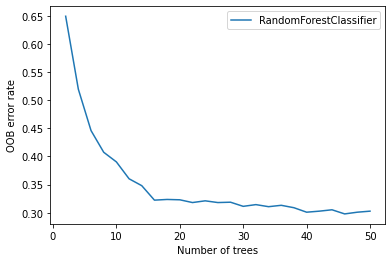

In [ ]:
#Tune random forest classifier number of trees by plotting a oob error rate per tree number
from collections import OrderedDict
ensemble_clfs = [
    (
        "RandomForestClassifier",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 2
max_estimators = 50

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators+1 , 2):
        #print(i)
        clf.set_params(n_estimators=i)
        clf.fit(xTrain, yTrain)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        #print(oob_error)
        error_rate[label].append((i, oob_error))
        

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)


plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


In [ ]:
# create a random forest object
rf = RandomForestClassifier(n_estimators=41)

# train the model on the training data
rf.fit(xTrain, yTrain)

# make predictions on the testing data
predictions = rf.predict(xTest)

# evaluate the model performance
accuracy = accuracy_score(yTest, predictions)
confusionMatrixRandomForest = confusion_matrix(yTest, predictions)

print("Accuracy:", accuracy)
print("Confusion matrix:", confusionMatrixRandomForest)

Accuracy: 0.7475490196078431
Confusion matrix: [[  3   6   5   3]
 [  0 106   6  17]
 [  2  20  41  32]
 [  0   2  10 155]]


In [ ]:
# create a decision tree object
dt = DecisionTreeClassifier()

# train the model on the training data
dt.fit(xTrain, yTrain)

# make predictions on the testing data
predictions = dt.predict(xTest)

# evaluate the model performance
accuracy = accuracy_score(yTest, predictions)
confusionMatrixDecisionTree = confusion_matrix(yTest, predictions)

print("Accuracy:", accuracy)
print("Confusion matrix:", confusionMatrixDecisionTree)

Accuracy: 0.6446078431372549
Confusion matrix: [[  6   4   6   1]
 [ 11  92  14  12]
 [  3  24  42  26]
 [  1  16  27 123]]


In [ ]:
#Next Steps
#focus on model interepretability
#Random Forest: rank features in order of importance
#Association algorithms (apriori)
#SHAP